In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train_V2.csv', 'sample_submission_V2.csv', 'test_V2.csv']


In [172]:
train = pd.read_csv('../input/train_V2.csv')
test = pd.read_csv('../input/test_V2.csv')

In [173]:
# shape of train data
train.shape

(4446966, 29)

In [174]:
#shape of test data.

test.shape

(1934174, 28)

In [175]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [176]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [177]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 28 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
dtypes: float64(5), int64(19), object(4)
memory usage: 413.2+ MB


In [178]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [179]:
train[train.winPlacePerc.isnull()]
train.drop(2744604,inplace=True)

In [180]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [181]:
# Number of matches played in  train  data.
#matchId
len(train.matchId.unique())

47964

In [182]:
train.groupby('matchId')['matchId'].count()

matchId
0000a43bce5eec     95
0000eb01ea6cdd     98
0002912fe5ed71     95
0003b92987589e    100
0006eb8c17708d     93
00077604e50a63     98
00086c74bb4efc     98
00086e740a5804     98
001125344b660c     96
001360264d4b5f     91
0014d9d1b0aff6     94
001616ed5da99b     97
0016fe3ee17ce7     97
00177a6ce4dfb5     92
00188d50e054f5     92
001937f739426c     95
0019bc34b3c58e     97
0019d729577e9c     94
001cd8e7e6b737     24
001e5e4799a31c     92
001e7bc06b1611     59
001eeedf57047a     99
00200fe5d9aae5     99
0022adebf59be6     96
0022e660571ee8     97
00232f9d9c5421     96
0025477f88bbd9     94
002771bd25fe0e     92
0027a504cd3b0c     99
0027b1ffb2e346     17
                 ... 
ffdebe280440e8     86
ffdf8e9dc18596     98
ffdff4a21177ea     92
ffe08b9747a59f     94
ffe21d8fafaf43     96
ffe2a50b7023fb     89
ffe2ee39f210ff     92
ffe6c9fd39b935     98
ffe71c86ca1d81     97
ffe7d37a82297b     98
ffe94ff48407e7     93
ffead5be0b50e8     98
ffeaf5f7073d41     89
ffeb2131284e45     94
ff

In [183]:
#visualization
group = train[train['matchId']=='a329ac99449ad7']['groupId'].value_counts().sort_values(ascending=False)


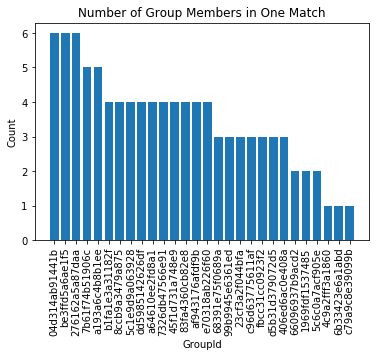

Min number of group members is:  1
Max number of group members is:  6


In [184]:
plt.figure()
plt.bar(group.index,group.values)
plt.xticks(rotation=90)
plt.xlabel('GroupId')
plt.ylabel('Count')
plt.title('Number of Group Members in One Match')
plt.show()

print('Min number of group members is: ',min(group.values))
print('Max number of group members is: ',max(group.values))

The average person kills 0.9248 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 72.


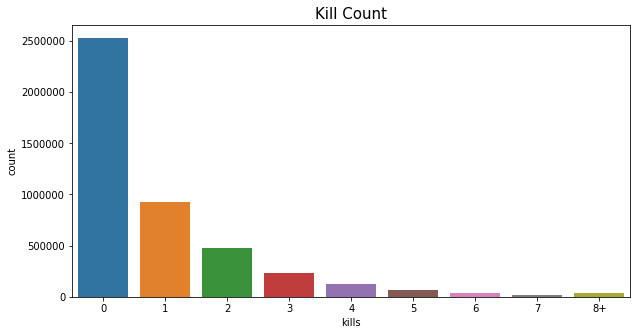

In [185]:
import seaborn as sns
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}.".format(train['kills'].mean(),train['kills'].quantile(0.99), train['kills'].max()))
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(10,5))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


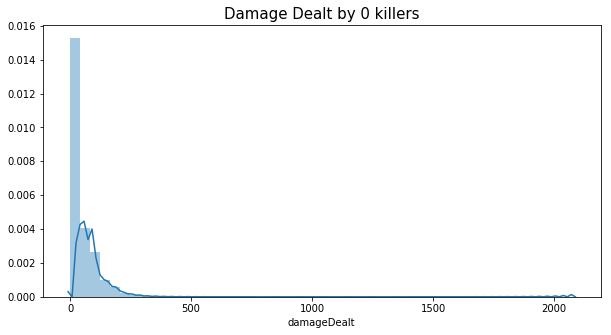

In [186]:
data = train.copy()
data = data[data['kills']==0]
plt.figure(figsize=(10,5))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

In [187]:
print("{} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(train)))

data1 = train[train['damageDealt'] == 0].copy()
print("{} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(train)))

16666 players (0.3748%) have won without a single kill!
4770 players (0.1073%) have won without dealing damage!


In [188]:
def visualize(col_name, num_bin=10):
    '''
    Function for visualization
    '''
    title_name = col_name[0].upper() + col_name[1:]
    f, ax = plt.subplots()
    plt.xlabel(title_name)
    plt.ylabel('log Count')
    ax.set_yscale('log')
    train.hist(column=col_name,ax=ax,bins=num_bin)
    plt.title('Histogram of ' + title_name)
    tmp = train[col_name].value_counts().sort_values(ascending=False)

    print('Min value of ' + title_name + ' is: ',min(tmp.index))
    print('Max value of ' + title_name + ' is: ',max(tmp.index))

Min value of RoadKills is:  0
Max value of RoadKills is:  18


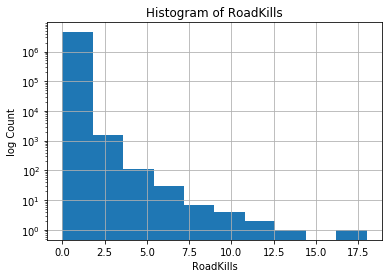

In [189]:
visualize('roadKills')

Min value of Assists is:  0
Max value of Assists is:  22


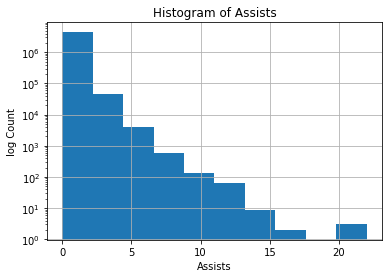

In [190]:
visualize('assists')

Min value of TeamKills is:  0
Max value of TeamKills is:  12


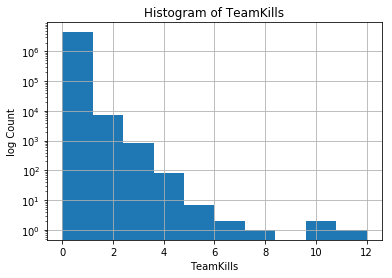

In [191]:
visualize('teamKills')

Min value of KillStreaks is:  0
Max value of KillStreaks is:  20


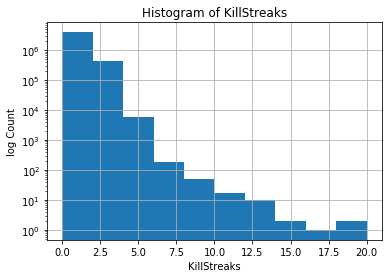

In [192]:
visualize('killStreaks')

Min value of LongestKill is:  0.0
Max value of LongestKill is:  1094.0


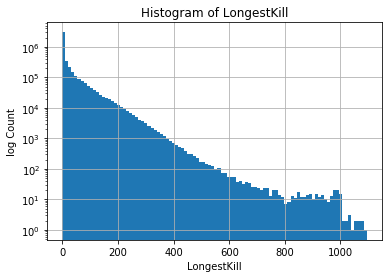

In [193]:
visualize('longestKill',num_bin=100)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


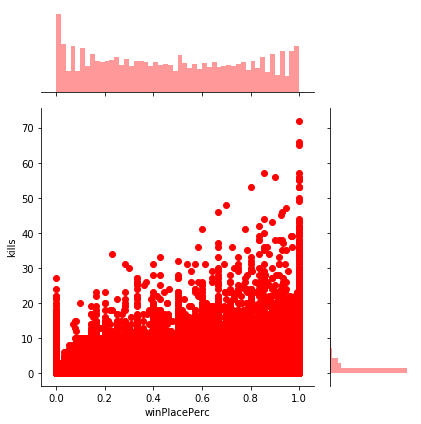

In [194]:
sns.jointplot(x="winPlacePerc", y="kills", data=train,ratio=3, color="r")
plt.show()

In [195]:
print("The average person walks for {:.1f}m, 99% of people have walked {}m or less, while the marathoner champion walked for {}m.".format(train['walkDistance'].mean(), train['walkDistance'].quantile(0.99), train['walkDistance'].max()))

The average person walks for 1154.2m, 99% of people have walked 4396.0m or less, while the marathoner champion walked for 25780.0m.


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


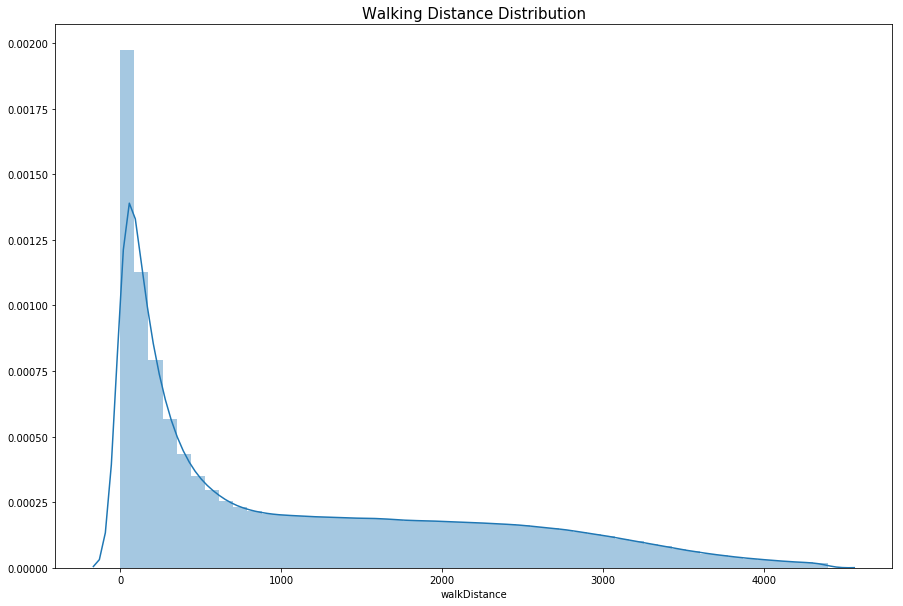

In [196]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

In [197]:
print("{} players ({:.4f}%) walked 0 meters. This means that they die before even taking a step or they are ready (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(train)))

99602 players (2.0328%) walked 0 meters. This means that they die before even taking a step or they are ready (more possible).


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


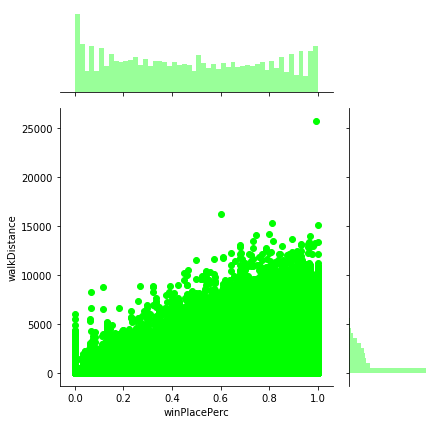

In [198]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train, ratio=3, color="lime")
plt.show()

Min value of DBNOs is:  0
Max value of DBNOs is:  53


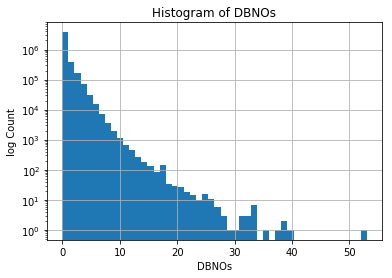

In [199]:
visualize('DBNOs',num_bin=50)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


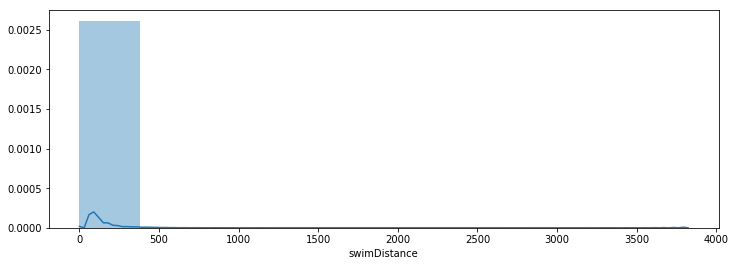

In [200]:
plt.subplots(figsize=(12, 4))
sns.distplot(train.swimDistance,bins=10)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


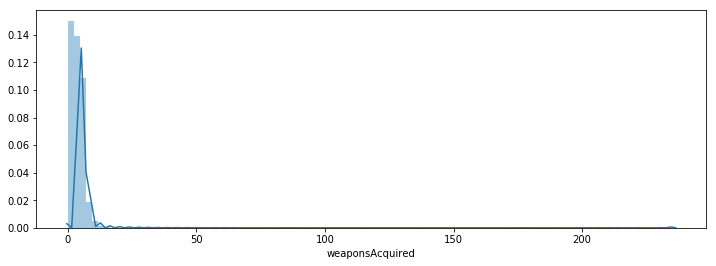

In [201]:
plt.figure(figsize=(12,4))
sns.distplot(train['weaponsAcquired'], bins=100)
plt.show()

Min value of Revives is:  0
Max value of Revives is:  39


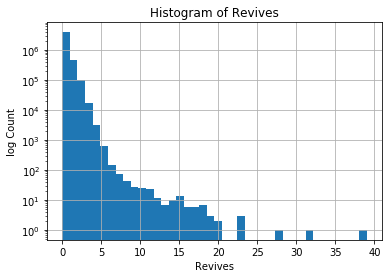

In [202]:
visualize('revives',num_bin=40)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


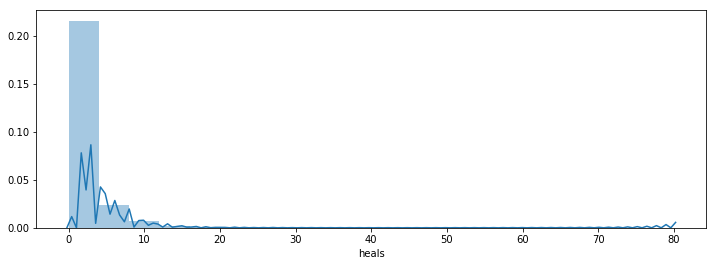

In [203]:
plt.subplots(figsize=(12,4))
sns.distplot(train.heals, bins=20)

In [204]:
# Create the dummy variable for categorical variable present in our data set.


#train

train=pd.get_dummies(train,columns=['matchType'])

#test

test=pd.get_dummies(test,columns=['matchType'])

In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 44 columns):
Id                            object
groupId                       object
matchId                       object
assists                       int64
boosts                        int64
damageDealt                   float64
DBNOs                         int64
headshotKills                 int64
heals                         int64
killPlace                     int64
killPoints                    int64
kills                         int64
killStreaks                   int64
longestKill                   float64
matchDuration                 int64
maxPlace                      int64
numGroups                     int64
rankPoints                    int64
revives                       int64
rideDistance                  float64
roadKills                     int64
swimDistance                  float64
teamKills                     int64
vehicleDestroys               int64
walkDistance

In [206]:
#feature selection


In [207]:
from sklearn.ensemble import RandomForestRegressor

In [208]:
#before that first drop some unnecessary columns.


train.drop(['Id','groupId','matchId'],axis=1,inplace=True)

test_id=test['Id']
test.drop(['Id','groupId','matchId'],axis=1,inplace=True)

In [209]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 41 columns):
assists                       int64
boosts                        int64
damageDealt                   float64
DBNOs                         int64
headshotKills                 int64
heals                         int64
killPlace                     int64
killPoints                    int64
kills                         int64
killStreaks                   int64
longestKill                   float64
matchDuration                 int64
maxPlace                      int64
numGroups                     int64
rankPoints                    int64
revives                       int64
rideDistance                  float64
roadKills                     int64
swimDistance                  float64
teamKills                     int64
vehicleDestroys               int64
walkDistance                  float64
weaponsAcquired               int64
winPoints                     int64
winPlacePerc 

In [210]:
sample = 400000
df_sample = train.sample(sample)

In [211]:
y=df_sample['winPlacePerc']
df = df_sample.drop(columns = ['winPlacePerc'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400000 entries, 3422676 to 3753157
Data columns (total 40 columns):
assists                       400000 non-null int64
boosts                        400000 non-null int64
damageDealt                   400000 non-null float64
DBNOs                         400000 non-null int64
headshotKills                 400000 non-null int64
heals                         400000 non-null int64
killPlace                     400000 non-null int64
killPoints                    400000 non-null int64
kills                         400000 non-null int64
killStreaks                   400000 non-null int64
longestKill                   400000 non-null float64
matchDuration                 400000 non-null int64
maxPlace                      400000 non-null int64
numGroups                     400000 non-null int64
rankPoints                    400000 non-null int64
revives                       400000 non-null int64
rideDistance                  400000 non-null 

In [212]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(df,y,test_size=0.3,random_state=40)

In [213]:
from sklearn.metrics import mean_absolute_error

In [214]:
def score(m : RandomForestRegressor):
    res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(m.predict(X_valid), y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [215]:

m1 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)

m1.fit(X_train, y_train)
score(m1)

['mae train: ', 0.04548294855729857, 'mae val: ', 0.06476636836598611]


In [216]:
importance=m1.feature_importances_

In [217]:
data=pd.DataFrame(sorted(zip(m1.feature_importances_, df.columns)), columns=['Value','Feature'])

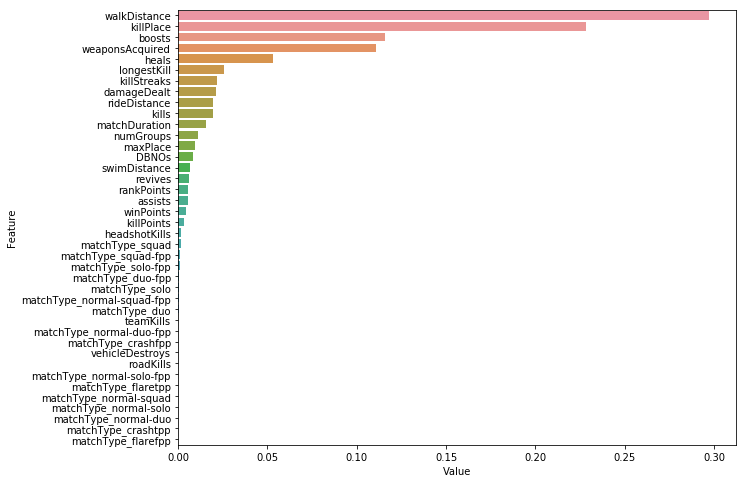

In [218]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Value", y="Feature", data=data.sort_values(by="Value", ascending=False))

In [219]:
#create new model based on these features(test).
new_data=data.sort_values(by='Value',ascending=False)[:25]

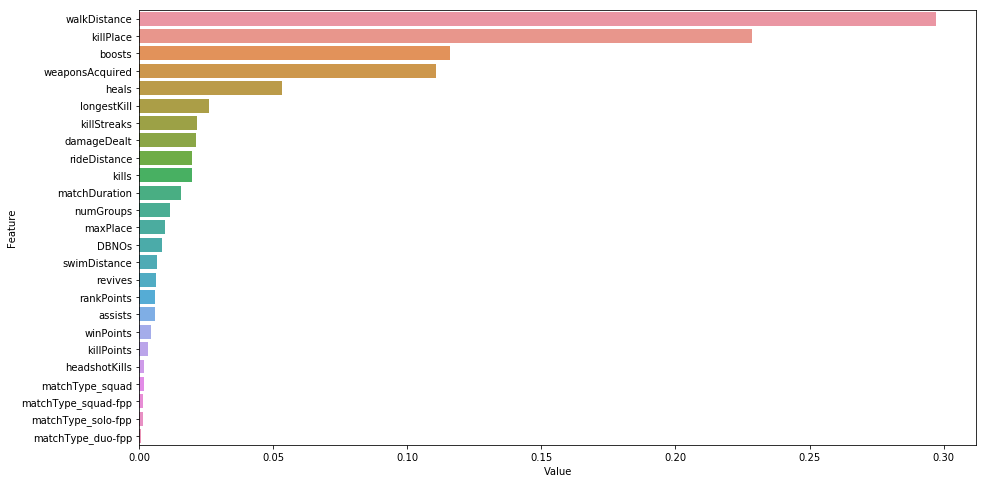

In [220]:
plt.subplots(figsize=(15,8))
sns.barplot(x='Value',y='Feature',data=new_data)

In [221]:
cols=new_data.Feature.values

In [222]:
#recreate for validation set
X_train,X_valid,y_train,y_valid=train_test_split(df[cols],y,test_size=0.3,random_state=40)

In [223]:
m1 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
m1.fit(X_train, y_train)
score(m1)

['mae train: ', 0.04085914158264578, 'mae val: ', 0.0626201869343976]


Comparision

In [224]:

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)
accuracy = model.score(X_valid,y_valid)
print('accuracy Random forest',accuracy*100,'%')

y_pred = model.predict(X_valid)

# getting the r2_score
r2 = r2_score(y_valid, y_pred)
print("The r2 score :", r2)


accuracy Random forest 91.38343578022659 %
The r2 score : 0.9138343578022659


In [225]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
accuracy = model1.score(X_valid,y_valid)
print('accuracy Linear Regressor',accuracy*100,'%')

y_pred1 = model.predict(X_valid)

# getting the r2_score
r2 = r2_score(y_valid, y_pred1)
print("The r2 score :", r2)


accuracy Linear Regressor 83.25007306399588 %
The r2 score : 0.9138343578022659


In [226]:

model2 = GradientBoostingRegressor(learning_rate=0.8)
model2.fit(X_train, y_train)
accuracy = model2.score(X_valid,y_valid)
print('accuracy Gradient',accuracy*100,'%')

y_pred2 = model2.predict(X_valid)


# getting the r2_score
r2 = r2_score(y_valid, y_pred2)
print("The r2 score :", r2)


accuracy Gradient 91.9164189672777 %
The r2 score : 0.919164189672777


In [227]:
y_final=train['winPlacePerc']
df_final = train.drop(columns = ['winPlacePerc'])
df_final.shape

(4446965, 40)

In [228]:
X_train,X_valid,y_train,y_valid=train_test_split(df_final,y_final,test_size=0.3,random_state=40)

In [229]:
m1 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
m1.fit(X_train, y_train)
score(m1)

['mae train: ', 0.04330556222181765, 'mae val: ', 0.060676038158598865]


In [230]:
# Replace all the infnite value from our test data. In Case ?

test.replace([np.inf, -np.inf], np.nan)
test.isnull().sum()

assists                       0
boosts                        0
damageDealt                   0
DBNOs                         0
headshotKills                 0
heals                         0
killPlace                     0
killPoints                    0
kills                         0
killStreaks                   0
longestKill                   0
matchDuration                 0
maxPlace                      0
numGroups                     0
rankPoints                    0
revives                       0
rideDistance                  0
roadKills                     0
swimDistance                  0
teamKills                     0
vehicleDestroys               0
walkDistance                  0
weaponsAcquired               0
winPoints                     0
matchType_crashfpp            0
matchType_crashtpp            0
matchType_duo                 0
matchType_duo-fpp             0
matchType_flarefpp            0
matchType_flaretpp            0
matchType_normal-duo          0
matchTyp

In [231]:
predictions = np.clip(a = m1.predict(test), a_min = 0.0, a_max = 1.0)
pred_df = pd.DataFrame({'Id' : test_id, 'winPlacePerc' : predictions})

# Create submission file
pred_df.to_csv("submission.csv", index=False)

In [232]:
final_output=pd.read_csv('submission.csv')

In [233]:
final_output.head()

,Id,winPlacePerc
0,9329eb41e215eb,0.232825
1,639bd0dcd7bda8,0.910947
2,63d5c8ef8dfe91,0.697630
3,cf5b81422591d1,0.548553
4,ee6a295187ba21,0.934472
